# Constrained $m(D^*)$

The goal of the document is to investigate the use of constrained $m(D*)$.
We'll look at $m(B^0)-m(D^*)+m(D^*)_{PDG}$. 

A more thorough analysis would define the constrained $m(B^0)$ by fixing $m(D*)$ at its PDG measured value, and redoing the reconstruction from this constrain.

Plotted:
- $m(B^0)-m(D^*)+m(D^*)_{PDG}$ of the `MC` data
- $m(B^0)-m(D^*)+m(D^*)_{PDG}$ of the `common` data

## Import

In [ ]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets
import pandas as pd


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data
import plot.histogram as h
from plot.tool import save_file

## Load

In [ ]:
variables = []

for particle in 'B0', 'Dst', 'D0','tau':
    variables.append(f"{particle}_M")

In [ ]:
df = {}
df['common'] = load_data(years,magnets,type_data = 'common'  ,vars = variables, cut_DeltaM=True, cut_PIDK=None)
df['MC']     = load_data(years,magnets,type_data = 'MC'      ,vars = variables, cut_DeltaM=True, cut_PIDK=None)

[Charmed, strange mesons](https://pdg.lbl.gov/2020/tables/rpp2020-tab-mesons-charm.pdf), P.A. Zyla et al. (Particle Data Group), Prog. Theor. Exp. Phys. 2020, 083C01 (2020)

$m(D_s^{*\pm}(2010)) = 2010.26 \pm 0.05\ MeV$

In [ ]:
Dst_M_PDG = 2010.26

## Invariant mass Plot

### MC data

#### $m(D^*)$

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/Dst_M_MC.pdf


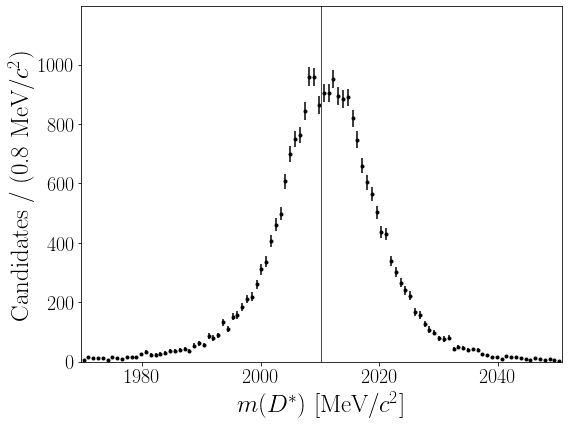

In [19]:
fig, ax = h.plot_hist_particle({'MC':df['MC']}, 'Dst_M',
              n_bins = 100, mode_hist = False, colors='black', save_fig=False)

ax.axvline(x=Dst_M_PDG, color='red', linewidth=1.)
save_file(fig, 'Dst_M_MC')

$m(D^0)$

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/D0_M_MC.pdf


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^0$) [MeV/$c^2$]', ylabel='Candidates / (0.8 MeV/$c^2$)'>)

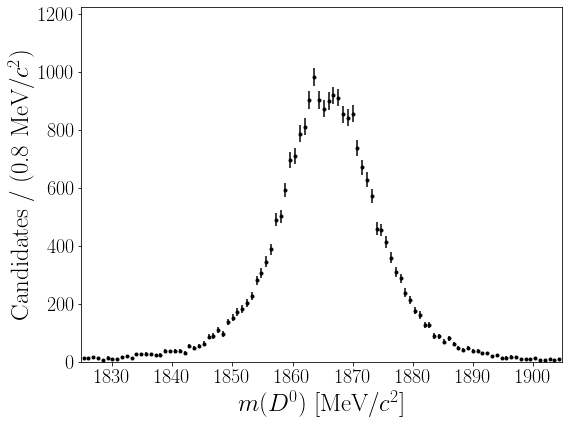

In [20]:
h.plot_hist_particle({'MC':df['MC']}, 'D0_M',
              n_bins = 100, mode_hist = False, colors='black')

## Constrained $m(B^0)$

I create a new dataset for the "constrained" $m(B^0)$ to adapt the code to my way of plotting histograms with `h.plot_hist`
- `df['common_constr']['B0_M']`
- `df['MC_constr']['B0_M']`

In [21]:
for d in 'MC', 'common':
    name_data = d + '_constr'
    df[name_data] = pd.DataFrame()
    df[name_data]["B0_M"] = df[d]["B0_M"] - df[d]['Dst_M'] + Dst_M_PDG

In [22]:
df.keys()

dict_keys(['common', 'MC', 'MC_constr', 'common_constr'])

## Plot histograms

### MC

In [23]:
low_MC = 5150.
high_MC = 5400.

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_MC_with_m(D^*)_=_2010.26_MeV_MC.pdf


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Proportion of candidates / (2 MeV/$c^2$)'>)

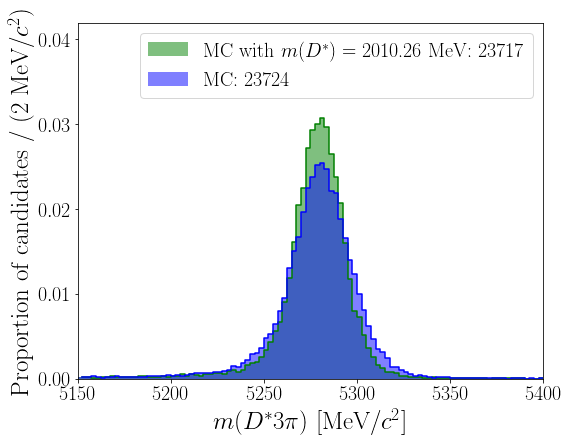

In [26]:
h.plot_hist_particle({f'MC with $m(D^*)$ = {Dst_M_PDG} MeV': df['MC_constr'],'MC':df['MC']}, 'B0_M',
              n_bins = 100, mode_hist = True, low=low_MC, high=high_MC, colors=['g', 'b'])

### Data

In [30]:
low = 5150.
high = 5550.

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_data_with_m(D^*)_=_2010.26_MeV_data.pdf


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($D^{*}3\\pi$) [MeV/$c^2$]', ylabel='Proportion of candidates / (4 MeV/$c^2$)'>)

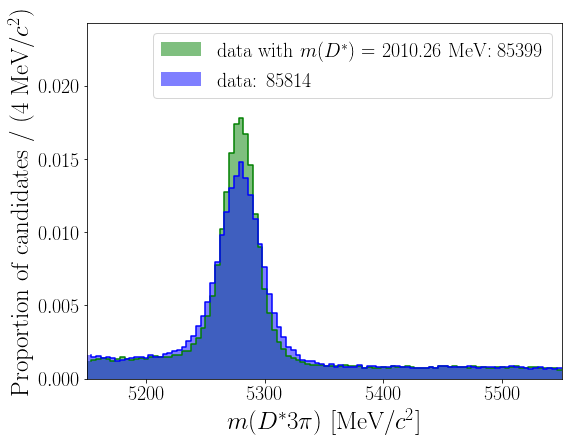

In [32]:
h.plot_hist_particle({f'data with $m(D^*)$ = {Dst_M_PDG} MeV': df['common_constr'],'data':df['common']}, 'B0_M',
              n_bins = 100, mode_hist = True, low=low, high=high, colors=['g', 'b'])